In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.metrics import RocCurveDisplay

import seaborn as sn
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()

import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

1. 數據清理: 需要確保數據集中沒有缺失值。
2. 數據轉換: 對於分類模型，需要將類別特徵（如workclass、education等）轉換為數值形式，"one-hot encoding"。
3. 訓練/測試集分割: 將數據集分割成訓練集和測試集，通常以80%作為訓練集，20%作為測試集。
4. 模型選擇與訓練: 對於二元分類，有許多可以選擇的模型，例如羅吉斯回歸（Logistic Regression）、決策樹（Decision Trees）等。
5. 模型評估: 使用準確度（accuracy）、召回率（recall）、精確度（precision）和F1分數（F1-score）。

# 1. Read data

In [2]:
data1 = pd.read_csv("/Users/yunmo/Documents/Cathay/adult/adult.data", header=None, 
                   names=['age','workclass','fnlwgt','education','education-num',
                          'marital-status','occupation','relationship','race','sex',
                          'capital-gain','capital-loss','hours-per-week','native-country','income'])
data1.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data2 = pd.read_csv("/Users/yunmo/Documents/Cathay/adult/adult.test", header=None, 
                   names=['age','workclass','fnlwgt','education','education-num',
                          'marital-status','occupation','relationship','race','sex',
                          'capital-gain','capital-loss','hours-per-week','native-country','income'])
data2.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
data = pd.concat([data1, data2])
data.shape

(48842, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


# 2. Clean data

In [6]:
data.isna().sum()  

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
obj_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for col in obj_cols:
    print('%s: %s' % (col, list(data[col].unique())))
    print("\n")

workclass: [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked']


education: [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']


marital-status: [' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']


occupation: [' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv']


relationship: [' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried', ' Other-relative']


race: [' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']


sex: [' Male', ' Female'

## 處理 ' ?'

In [8]:
def freq_attrib(var):
    attrib, counts = np.unique(data[var], return_counts = True)
    most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
    data[var][data[var] == ' ?'] = most_freq_attrib 

In [9]:
freq_attrib('workclass')
freq_attrib('occupation')
freq_attrib('native-country')

## 處理 income

In [10]:
data['income']=data['income'].map({' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1})

In [11]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


In [13]:
# data.to_csv (r'/Users/yunmo/Documents/Cathay/adult/cleaned.csv', index = True)

# 3. Descriptive statistics

In [14]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [15]:
data = data.drop(["fnlwgt"], axis=1)

In [16]:
data.drop(["income"], axis=1).describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


1. 年齡（age）：平均年齡約為38.64歲，最年輕的人17歲，最年長的人90歲。
2. 教育年數（education-num）：平均教育年數為10.08年，最少為1年，最多為16年。
3. 資本收益（capital-gain）：平均資本收益為1079.07，最大值為99999。
4. 資本損失（capital-loss）：平均資本損失為87.50，最大值為4356。
5. 每週工作時數（hours-per-week）：平均每週工作時數為40.42小時，最少為1小時，最多為99小時。
6. 收入（income）：大約有23.93%的人，收入>50K，76.07%收入<=50K

In [17]:
data.groupby('income').agg({'income':'count'})

,income
income,
0,37155
1,11687


In [18]:
data.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


1. 工作類型（workclass）：最常見的工作類型是私人就業（Private），有36,705人。
2. 教育程度（education）：最常見的教育程度是高中畢業（HS-grad），有15,784人。
3. 婚姻狀態（marital-status）：最常見的婚姻狀態是已婚夫婦（Married-civ-spouse），有22,379人。
4. 職業（occupation）：最常見的職業是專業特殊職業（Prof-specialty），有8,981人。
5. 親屬關係（relationship）：最常見的親屬關係是丈夫（Husband），有19,716人。
6. 種族（race）：最常見的種族是白人（White），有41,762人。
7. 性別（sex）：男性（Male）32,650人，女性（Female）16,192人。
8. 原籍國（native-country）：最常見的原籍國是美國（United-States），有44,689人。

# 5. EDA

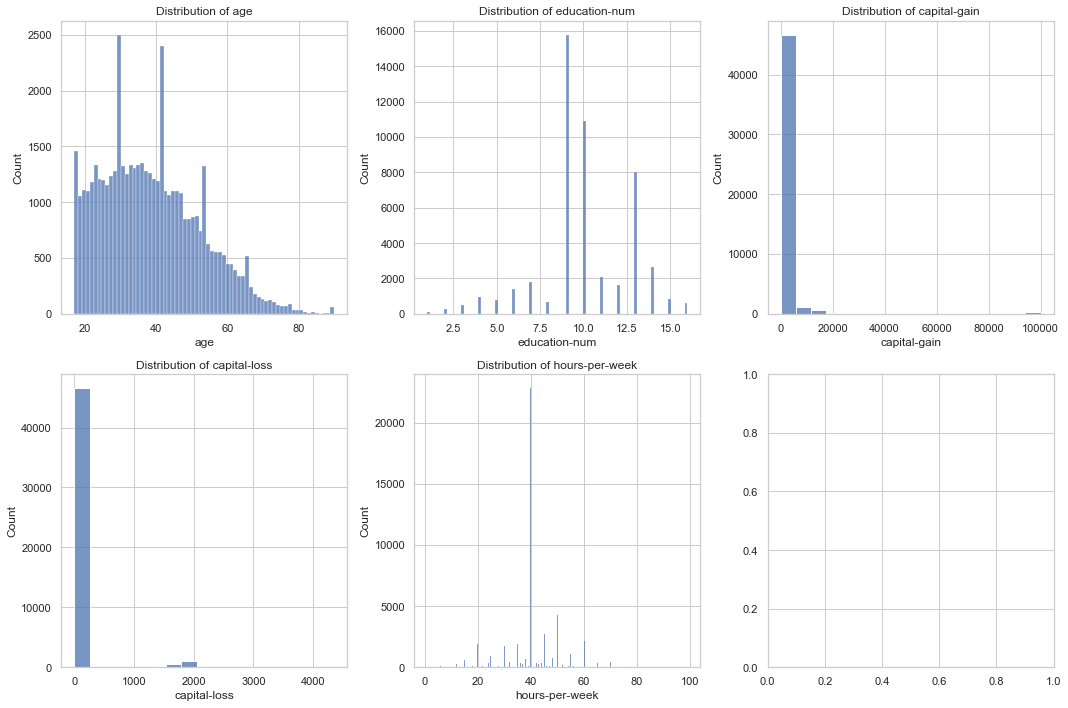

In [19]:
sns.set(style="whitegrid")
features_to_plot = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    row = i // 3
    col = i % 3
    sns.histplot(data[feature], kde=False, ax=axs[row, col])
    axs[row, col].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

1. 年齡（age）：大多數人的年齡集中在20至60歲之間，少數人的年齡超過60歲。
2. 教育年數（education-num）：大多數人的教育年數在9至13年之間，只有少數人的教育年數較低或較高。
3. 資本收益（capital-gain）：絕大多數人的資本收益為0，只有少數人有非零的資本收益。
4. 資本損失（capital-loss）：與資本收益類似，絕大多數人的資本損失為0，只有少數人有非零的資本損失。
5. 每週工作時數（hours-per-week）：大多數人的每週工作時數為40小時，也有一些人的工作時數較少或較多。

資本收益和資本損失的分佈顯示出大多數人都沒有資本收益或損失，這可能意味著大多數人的收入主要來自工資，而不是投資。

In [20]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 5.2 收入 v.s. 年紀

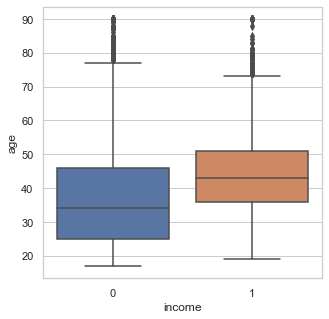

In [21]:
fig = plt.figure(figsize=(5,5)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [22]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.275178
0,0,36.872184


收入（<=50k）的中位數“年齡”為 36.8 歲。收入（>50k）來說是 44.2 年

收入超過50K的人群的年齡中位數比收入50K以下的人群高。表示隨著年齡的增長，經驗和技能的累積，一個人的收入可能會增加。

## 5.3 收入 v.s. 工作時間

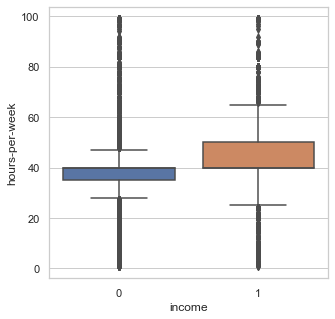

In [23]:
fig = plt.figure(figsize=(5, 5)) 
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

1. 收入 > 5 萬的收入組的“每週工作時間”中位數大於收入 <= 5 萬的收入組: 收入越高基本上需花費更多的時間，多勞多得。     
     
2. 
收入超過 5 萬的收入群體每週花費約 44 小時。（中位數）     
收入 <= 5 萬的收入群體每週花費約 38 小時。     
收入 <= 50k 的收入組的箱線圖的最小值 (q1-1.5 IQR) 和最大值 (q3+ 1.5 IQR) 即(28,48) 的範圍較小。     
但是收入 > 50k 的收入組的箱線圖的範圍較大 最小值 (q1-1.5 IQR) 和最大值 (q3+ 1.5 IQR)，即(23,63)。     
     
3. 收入>5萬的收入群體有靈活的工作時間。較多異常值出現在收入 <= 5 萬的收入組中。

## 5.4 Workclass

In [24]:
def plot_bar(var):
    plt.figure(figsize=(25,10))
    total = float(len(data) )

    ax = sns.countplot(x=var, hue="income", data=data)
    for p in ax.patches:
        height = p.get_height()
#         ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2f}'.format((height/total)*100), ha="center") 
        ax.text(p.get_x()+p.get_width()/2., height + 3,f'{round(((height/total)*100), 2)} %', ha="center") 
    plt.show()

posx and posy should be finite values
posx and posy should be finite values


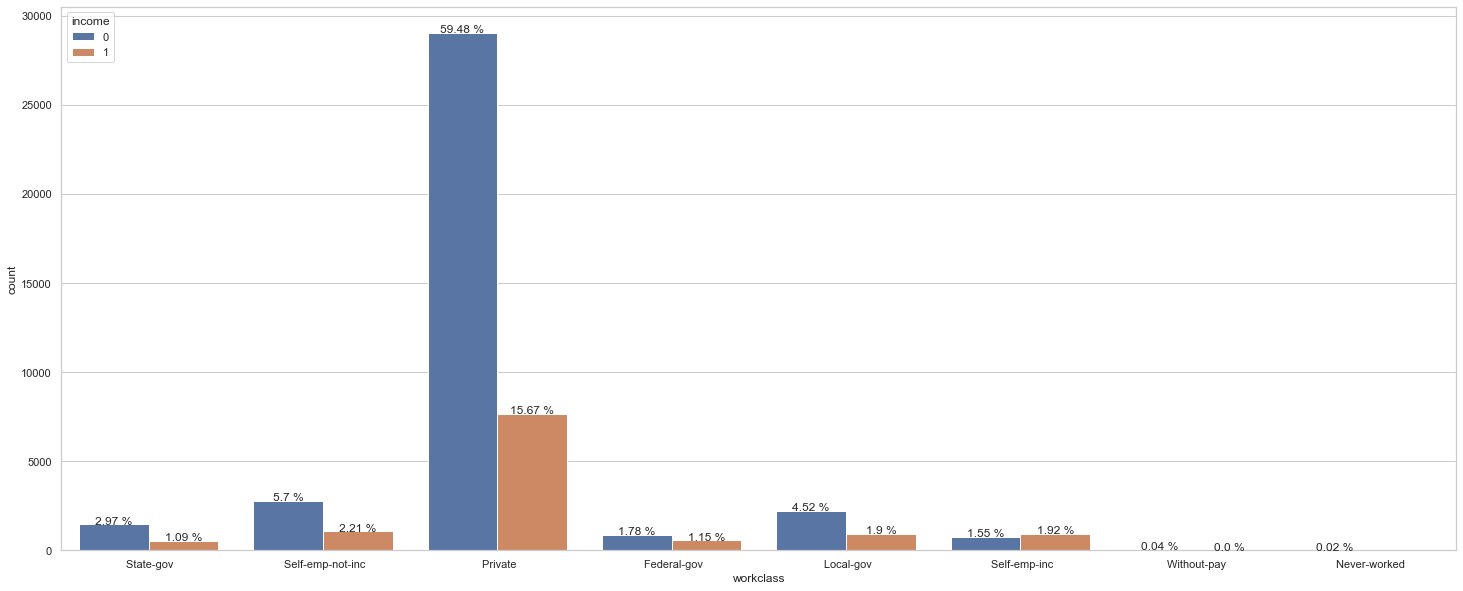

In [25]:
plot_bar("workclass")

'Self-emp-inc'（自僱公司）的人有相對較高的收入超過50K的比例，而'Without-pay'（無薪）和'Never-worked'（從未工作）的人則沒有超過50K的收入。顯示工作類型可能會影響一個人的收入。

## 5.5 Education

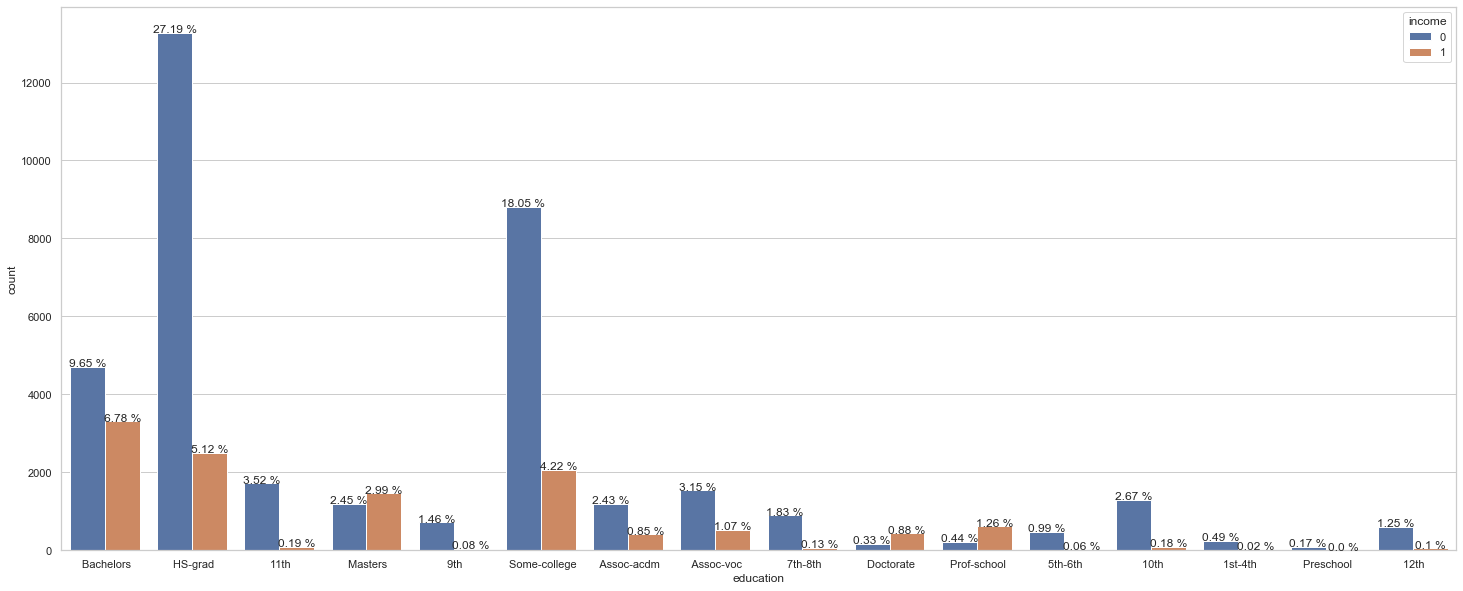

In [26]:
plot_bar("education")

儘管大多數類別都屬於高中畢業(HS-grad)，但只有 5.14% 的人屬於收入第 1 組(即收入超過 5 萬)     
只有少數類別屬於收入組 1 的比例大於屬於收入組 0 的比例(prof-school, masters, doctorate)，可見較高的教育程度可能會帶來更好的收入。

## 5.6 Marital-status

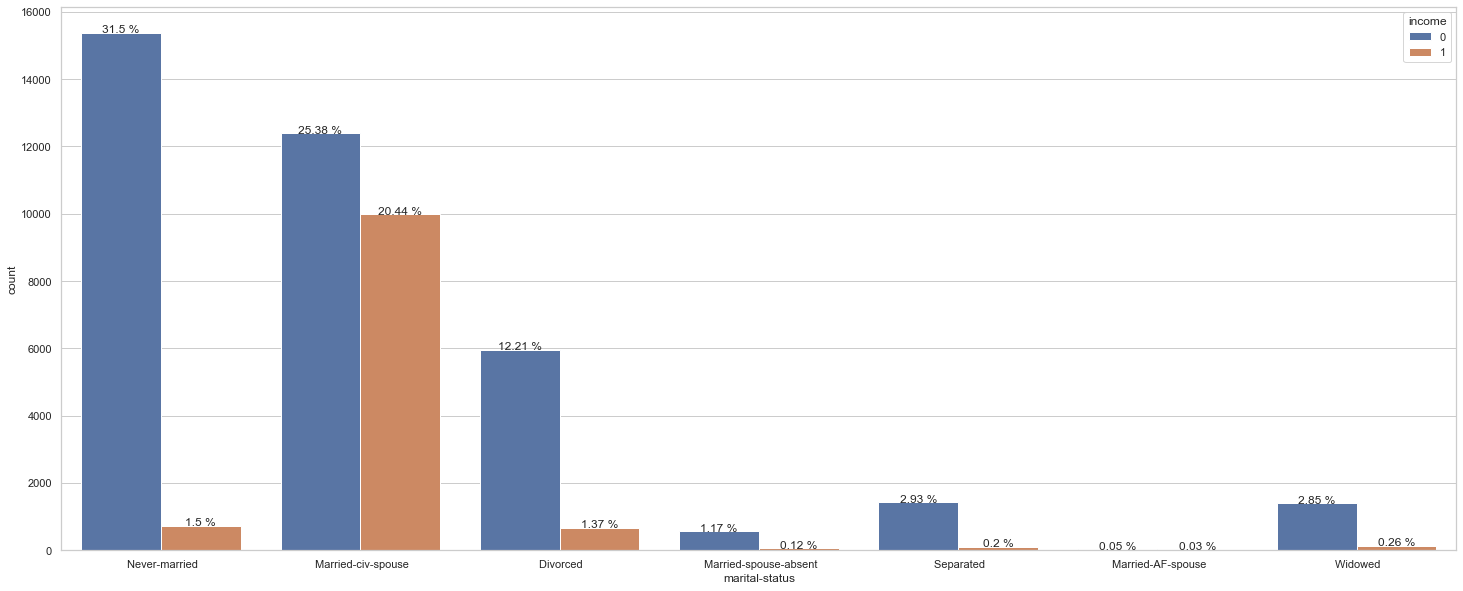

In [27]:
plot_bar("marital-status")

In [28]:
data[['income', 'marital-status']].groupby(by=['marital-status', 'income'],as_index=False).size()\
                                  .rename({'size':'cnt'}, axis=1)\
                                  .sort_values(by=['marital-status', 'income', 'cnt'], ascending=True)

,marital-status,income,cnt
0,Divorced,0,5962
1,Divorced,1,671
2,Married-AF-spouse,0,23
3,Married-AF-spouse,1,14
4,Married-civ-spouse,0,12395
5,Married-civ-spouse,1,9984
6,Married-spouse-absent,0,570
7,Married-spouse-absent,1,58
8,Never-married,0,15384
9,Never-married,1,733


In [29]:
data[['marital-status']].groupby(by=['marital-status'],as_index=False).size()\
                                  .rename({'size':'cnt'}, axis=1)\
                                  .sort_values(by=['cnt'], ascending=False)

,marital-status,cnt
2,Married-civ-spouse,22379
4,Never-married,16117
0,Divorced,6633
5,Separated,1530
6,Widowed,1518
3,Married-spouse-absent,628
1,Married-AF-spouse,37


已婚公民配偶(Married-civ-spouse)屬於收入第一組（>5萬）的比例最高（20.44%）。     
儘管未婚(Never-married)人數，佔marital-status整體類別第二高，但只有 1.51% 的人收入超過 5 萬。     
顯示婚姻狀態可能會影響一個人的收入。

## 5.7 Occupation

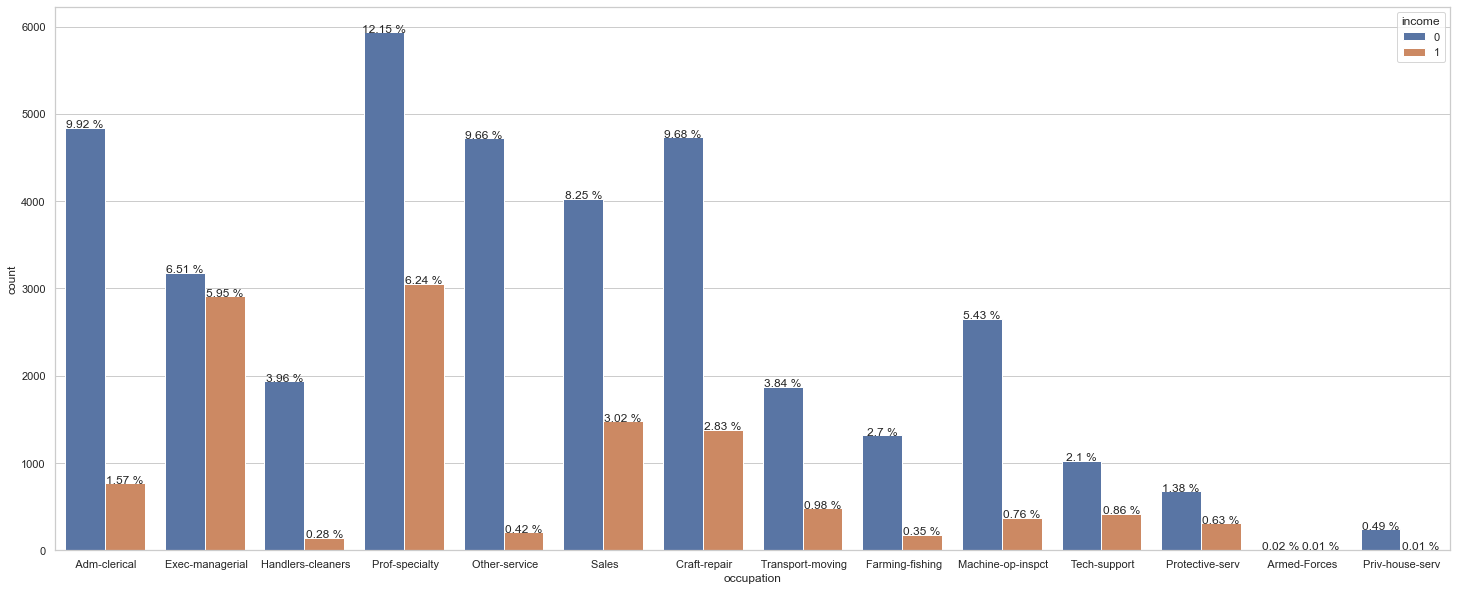

In [30]:
plot_bar("occupation")

教授專業(Prof-specialty)在整個類別中屬於收入組 0 和 1 的比例最高，分別為 1215% 和 6.24%。     
沒有任何職業在收入組 1 中的下降百分比高於收入組 0。即在每個職業中，收入低於 5 萬的人都大於收入 > 5 萬的人。

## 5.8 Relationship

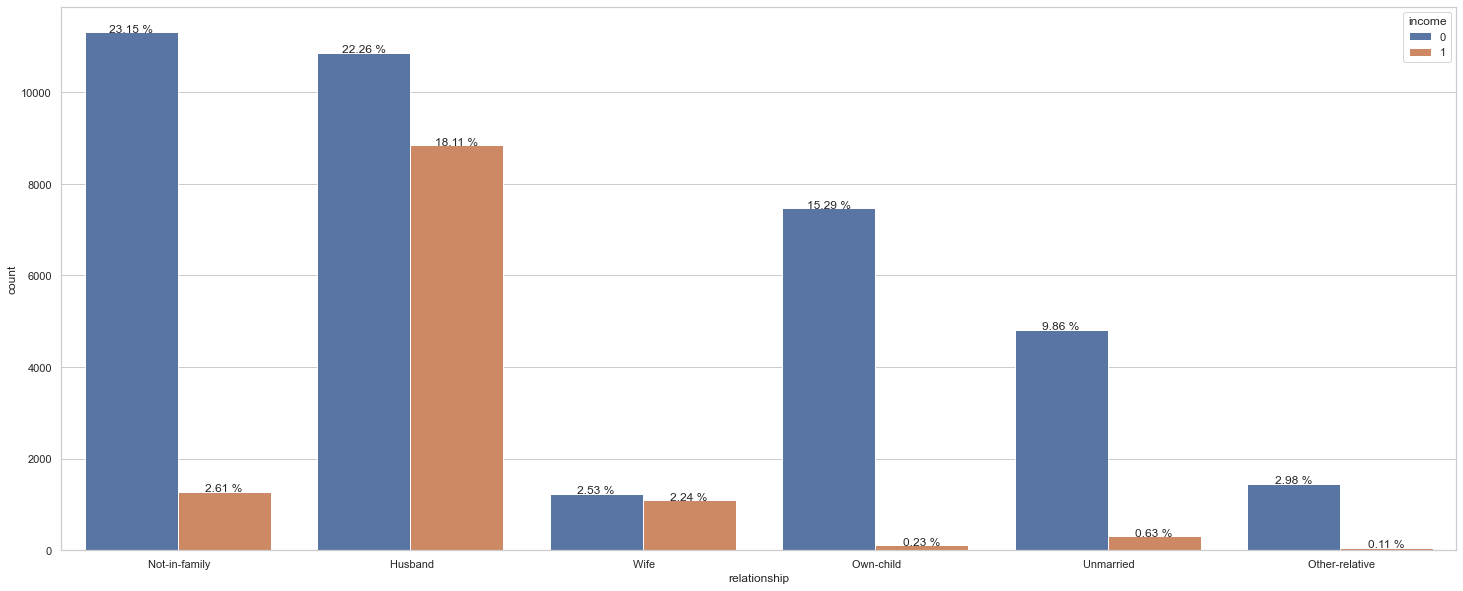

In [31]:
plot_bar("relationship")

在所有其他類別中，husbands收入 > 5 萬的比例最高（18.11%）。    
非家庭成員(not-in-family)收入低於 5 萬的比例最高（23.15%）。    
Wife類別收入>5萬和<5萬的比例幾乎相同。    
除husbands和Wife外，其他組的百分比均存在巨大差異。   

## 5.9 Race

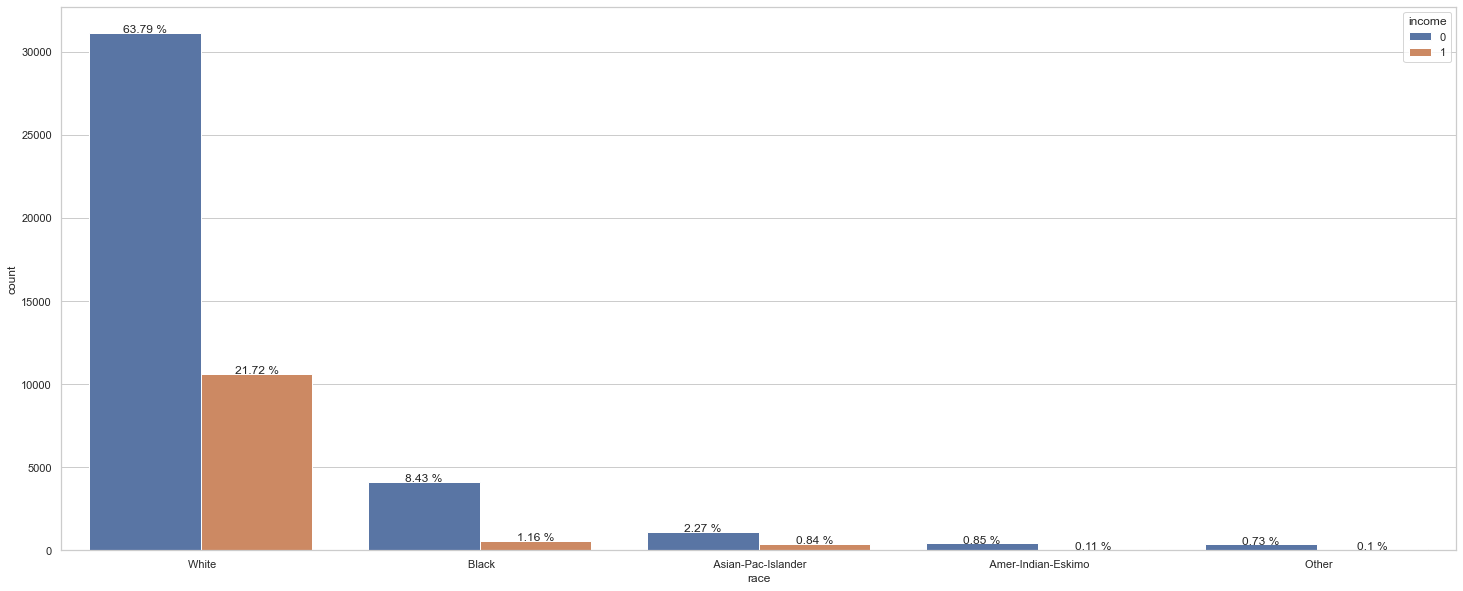

In [32]:
plot_bar("race")

## 5.10 Sex

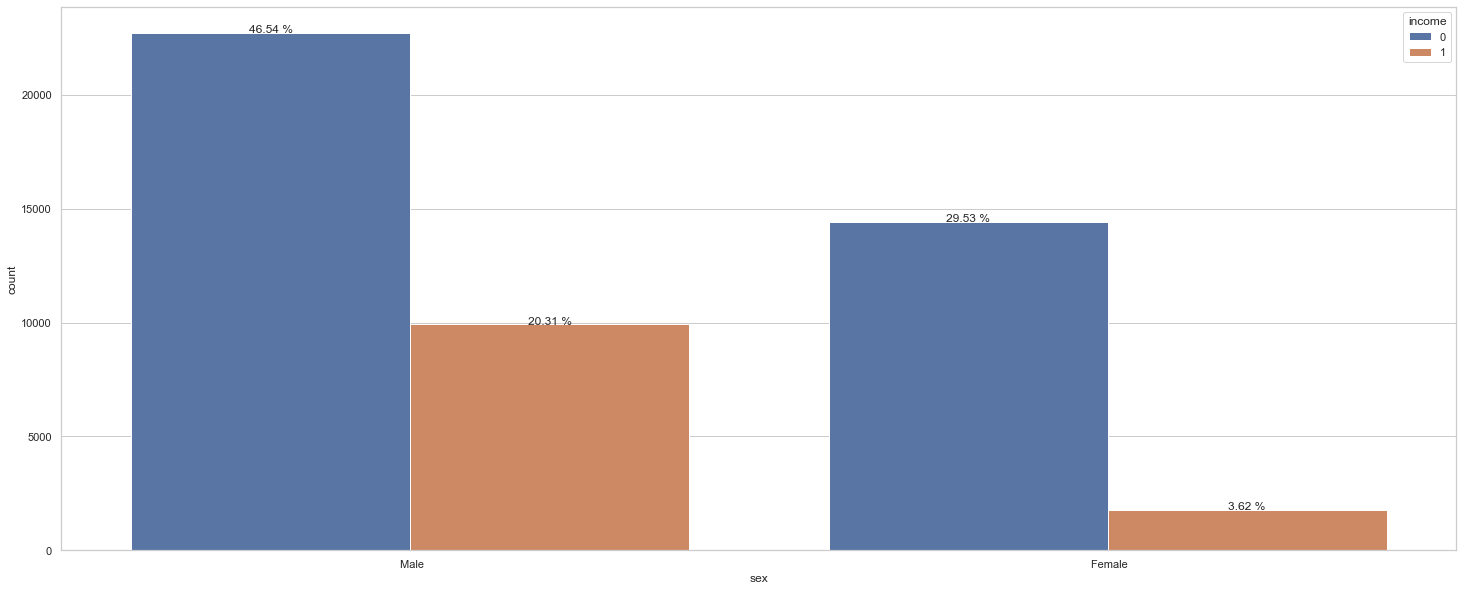

In [33]:
plot_bar("sex")

對於“女性”來說，收入超過 5 萬的情況很少見，僅佔所有觀察值的 3.62%。     
對於男性來說，20.31%的人收入超過5萬。

# 6. Correlation

## 6.1 皮爾森相關

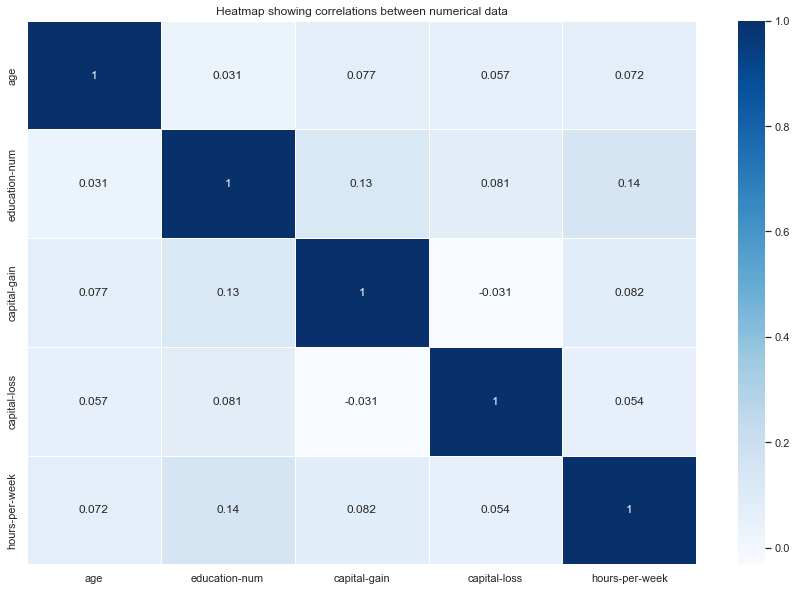

In [34]:
plt.figure(figsize=(15,10))  
sns.heatmap(data[['age','education-num','capital-gain','capital-loss','hours-per-week']].corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

數值屬性之間沒有很強的相關性。     
任何變量中既不存在強正相關，也不存在強負相關。     
教育程度和每週工作時間之間的相關性最強，係數為 0.14（相關性也很小）。

## 6.2 點二序列相關係數（Point Biserial Correlation Coefficient）

0.00-0.19：極弱相關     
0.20-0.39：弱相關     
0.40-0.59：中等相關     
0.60-0.79：強相關     
0.80-1.00：極強相關     

In [35]:
from scipy.stats import pointbiserialr
# Define numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate Point Biserial Correlation Coefficient
point_biserial_corr = {column: pointbiserialr(data[column], data['income']).correlation for column in numeric_features}

# Sort the result and convert it into a DataFrame for better visualization
point_biserial_corr = pd.DataFrame(sorted(point_biserial_corr.items(), key=lambda x: x[1], reverse=True), columns=['Feature', 'Point Biserial Correlation Coefficient'])
point_biserial_corr

,Feature,Point Biserial Correlation Coefficient
0,income,1.000000
1,education-num,0.332613
2,age,0.230369
3,hours-per-week,0.227687
4,capital-gain,0.223013
5,capital-loss,0.147554


education-num: 0.33，表示教育年數與收入有中度正相關。      
age: 0.23，表示年齡與收入有輕度正相關。      
hours-per-week: 0.23，表示每週工作時數與收入有輕度正相關。      
capital-gain: 0.22，表示資本收益與收入有輕度正相關。      
capital-loss: 0.15，表示資本虧損與收入有輕度正相關。            

# 7. Multivariate Analysis

## 7.1 income, hours-per-week, sex

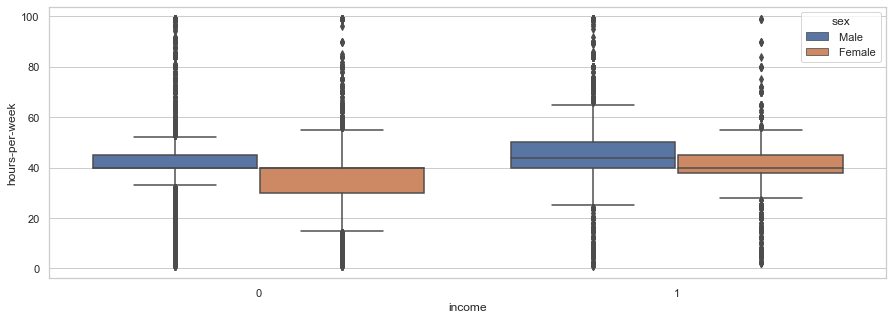

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(x='income',y ='hours-per-week', hue='sex',data=data)
plt.show()

在收入 < 5 萬的收入群體中，女性每週的工作時間更加靈活     
在收入 > 5 萬的收入群體中，男性每週的工作時間更加靈活

## 7.2 income, age, sex

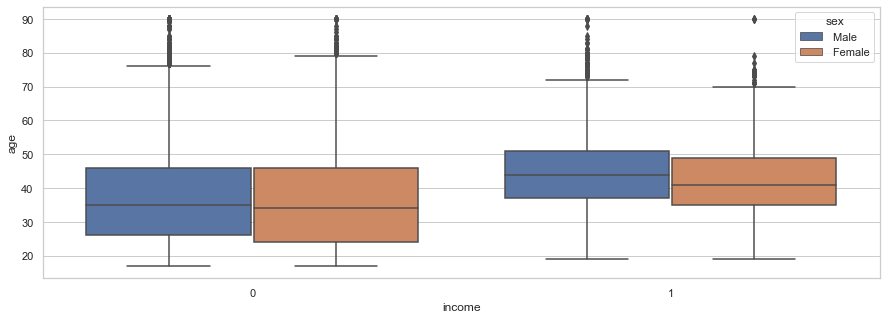

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(x="income", y="age",hue="sex",data=data)
plt.show()

收入低於 5 萬的女性'年齡'中位數與收入低於 5 萬的男性'年齡'中位數差異非常微小。     
但收入超過 5 萬的女性的中位'年齡'與收入超過 5 萬的男性的中位'年齡'相差 2 至 3 歲。

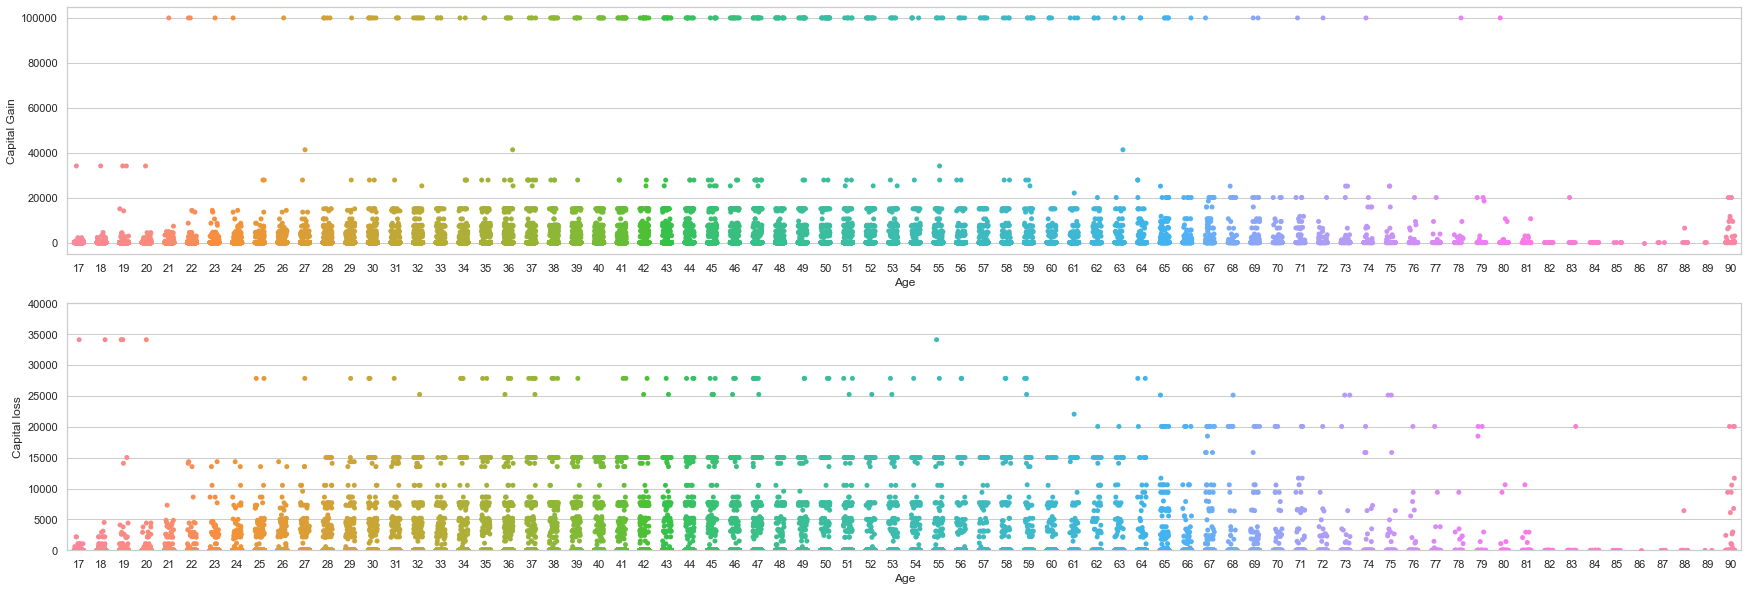

In [38]:
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital-gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital-gain', data = data,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital loss',fontsize = 12);
plt.ylim(0,40000);

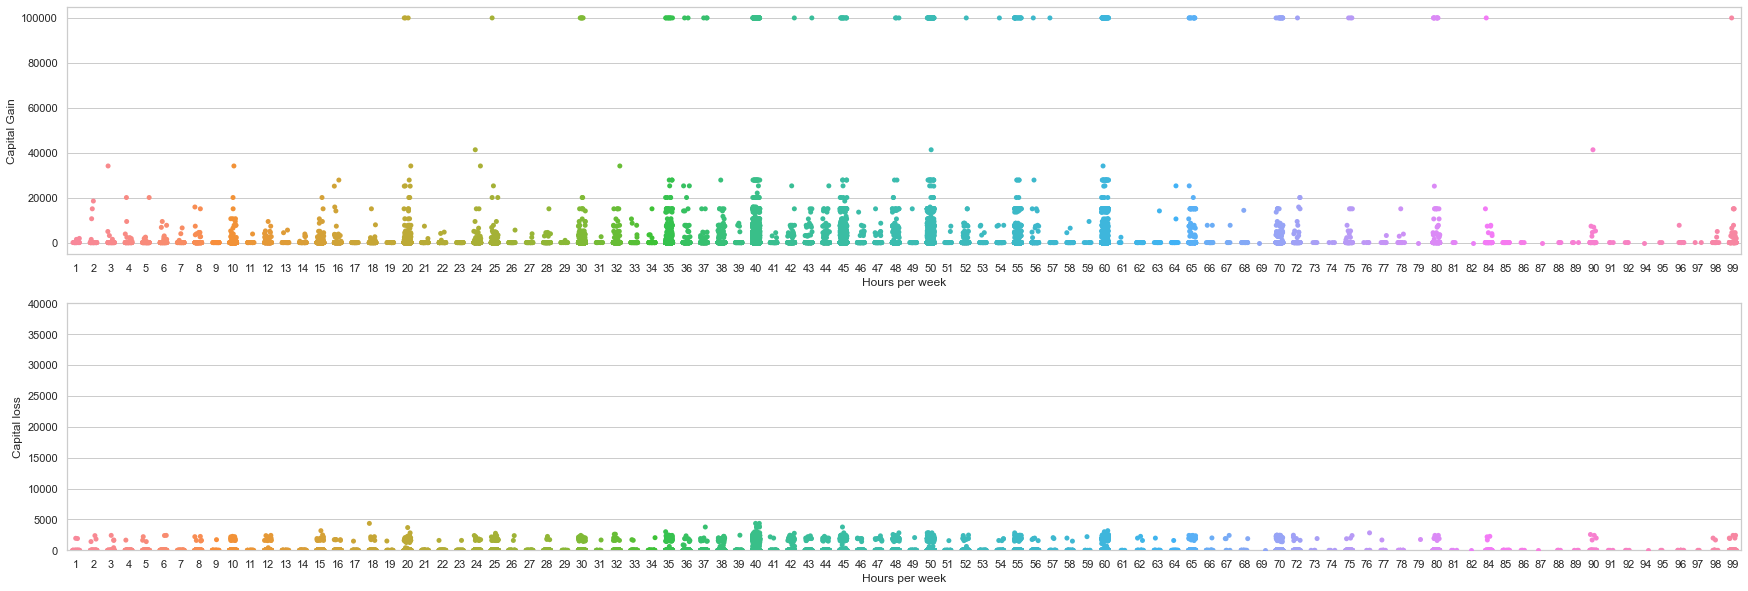

In [39]:
fig = plt.figure(figsize = (30, 10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('hours-per-week', 'capital-gain', data = data, jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('hours-per-week', 'capital-loss', data = data, jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital loss',fontsize = 12);
plt.ylim(0,40000);

大多數人每週工作 40、50 和 60 小時，資本收益似乎在增加。     
很少有人每週工作 99 小時，但似乎並沒有獲得很高的資本收益。      
相反，每週工作時間低於 40 小時的人卻獲得了很高的資本收益。

# 8. Model

In [40]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [41]:
data.drop(['capital-gain', 'capital-loss'], axis = 1, inplace = True)

## 8.1 清整數據 - 上採樣處理 - 類別變數轉dummy variable / 連續變數轉標準化

In [42]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = data[data.income==0]
df_minority = data[data.income==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,                  # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123)              # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.income.value_counts()

In [44]:
df_dummies = pd.get_dummies(df_upsampled)

In [45]:
# We will use the data frame where we had created dummy variables
X = df_dummies.drop(columns = ['income'])
y = df_dummies['income'].values

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [46]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## 8.2 Logistic Regression

In [47]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
result = model_log.fit(X_train, y_train)

In [48]:
train_accuracy = model_log.score(X_train, y_train)
test_accuracy = model_log.score(X_test, y_test)

train_accuracy, test_accuracy

(0.809026375992464, 0.8078993406001884)

訓練集上的準確度為80.9%，在測試集上的準確度為80.78%。
模型能夠在大約80%的情況下正確預測一個人的收入是否超過門檻。

In [49]:
y_test_pred_log = model_log.predict(X_test)
report = classification_report(y_test, y_test_pred_log, target_names=['<=50K', '>50K'])
print(report)

              precision    recall  f1-score   support

       <=50K       0.83      0.77      0.80      7326
        >50K       0.79      0.84      0.82      7536

    accuracy                           0.81     14862
   macro avg       0.81      0.81      0.81     14862
weighted avg       0.81      0.81      0.81     14862



1. 收入小於或等於50K的類別（<=50K）：
* 精確度（Precision）: 0.83，這表示預測為<=50K中，有83%是正確的。    
* 召回率（Recall）: 0.77，這表示所有真實為<=50K的案例中，有77%被正確預測出來。    
* F1分數（F1-score）: 0.80，精確度和召回率的調和平均數，用於綜合評估精確度和召回率。    
2. 收入大於50K的類別（>50K）：        
* 精確度（Precision）: 0.79，這表示預測為>50K中，有79%是正確的。    
* 召回率（Recall）: 0.84，這表示所有真實為>50K的實例中，有84%被正確預測出來了。    
* F1分數（F1-score）: 0.82，精確度和召回率的調和平均數，用於綜合評估精確度和召回率。

整體來看，此模型經過採樣以後，在預測收入<=50K與?50K的類別上，表現相當。

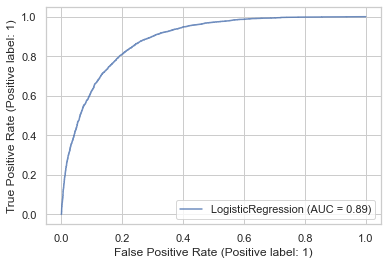

In [50]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

### <span style="color:#3498DB">什麼樣的因素與income呈現明顯的正向影響與負向影響 </span>

AxesSubplot(0.125,0.125;0.775x0.755)


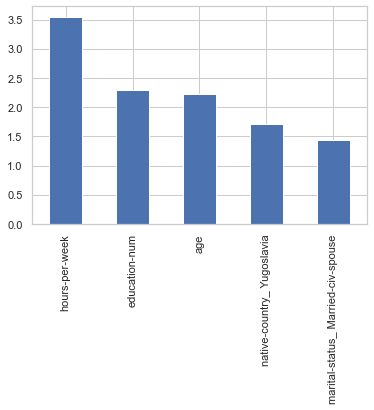

In [51]:
weights = pd.Series(model_log.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:5].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


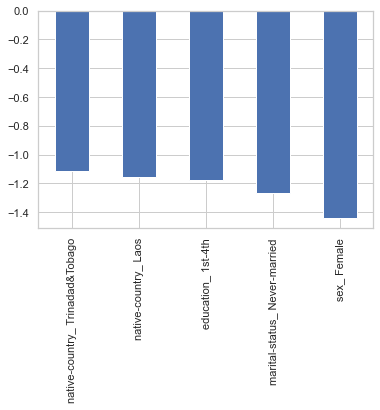

In [52]:
print(weights.sort_values(ascending = False)[-6:-1].plot(kind='bar'))

## 8.3  Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = 'gini')  # CART, 默認為gini
clf = model_dt.fit(X_train, y_train)
y_test_pred_dt = model_dt.predict(X_test)

In [54]:
train_accuracy = model_dt.score(X_train, y_train)
test_accuracy = model_dt.score(X_test, y_test)

train_accuracy, test_accuracy

(0.9656674740950074, 0.8879693177230521)

In [55]:
report = classification_report(y_test, y_test_pred_dt, target_names=['<=50K', '>50K'])
print(report)

              precision    recall  f1-score   support

       <=50K       0.93      0.83      0.88      7326
        >50K       0.85      0.94      0.90      7536

    accuracy                           0.89     14862
   macro avg       0.89      0.89      0.89     14862
weighted avg       0.89      0.89      0.89     14862



1. 收入小於或等於50K的類別（<=50K）：
* 精確度（Precision）: 0.86，這表示預測為<=50K中，有86%是正確的。    
* 召回率（Recall）: 0.87，這表示所有真實為<=50K的案例中，有87%被正確預測出來。    
* F1分數（F1-score）: 0.86，精確度和召回率的調和平均數，用於綜合評估精確度和召回率。    
2. 收入大於50K的類別（>50K）：        
* 精確度（Precision）: 0.56，這表示預測為>50K中，有56%是正確的。    
* 召回率（Recall）: 0.54，這表示所有真實為>50K的實例中，有54%被正確預測出來了。    
* F1分數（F1-score）: 0.55，精確度和召回率的調和平均數，用於綜合評估精確度和召回率。

整體來看，此模型在預測收入小於或等於50K的類別上表現較好。在預測收入大於50K的類別上，模型的表現則相對較弱。

### Decision Tree Optimization - Pruning

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [57]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=20)) # 挑選出K個分數最高的特徵
DecisionTree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))

In [58]:
hyper_params_dt = {
    'decisiontreeclassifier__max_leaf_nodes':[10,20,30],    # 最多有多少個leaf nodes
    'decisiontreeclassifier__min_samples_leaf': [5,10,15],  # 要成為leaf nodes，最少需要多少資料
    'decisiontreeclassifier__max_depth': [5,10,15]          # 限制樹的高度最多幾層
}

In [59]:
grid_dt = GridSearchCV(DecisionTree, hyper_params_dt, scoring='recall', cv=3)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('selectkbest',
                                                         SelectKBest(k=20))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=0))]),
             param_grid={'decisiontreeclassifier__max_depth': [5, 10, 15],
                         'decisiontreeclassifier__max_leaf_nodes': [10, 20, 30],
                         'decisiontreeclassifier__min_samples_leaf': [5, 10,
                                                                      15]},
             scoring='recall')

In [60]:
y_test_pred_griddt = grid_dt.predict(X_test)
report = classification_report(y_test, y_test_pred_griddt, target_names=['<=50K', '>50K'])
print(report)

              precision    recall  f1-score   support

       <=50K       0.82      0.75      0.78      7326
        >50K       0.78      0.84      0.81      7536

    accuracy                           0.79     14862
   macro avg       0.80      0.79      0.79     14862
weighted avg       0.80      0.79      0.79     14862



1. 收入小於或等於50K的類別（<=50K）：
* 精確度（Precision）: 0.82，這表示預測為<=50K中，有82%是正確的。    
* 召回率（Recall）: 0.75，這表示所有真實為<=50K的案例中，有75%被正確預測出來。    
* F1分數（F1-score）: 0.78，精確度和召回率的調和平均數，用於綜合評估精確度和召回率。    
2. 收入大於50K的類別（>50K）：        
* 精確度（Precision）: 0.78，這表示預測為>50K中，有78%是正確的。    
* 召回率（Recall）: 0.84，這表示所有真實為>50K的實例中，有84%被正確預測出來了。    
* F1分數（F1-score）: 0.81，精確度和召回率的調和平均數，用於綜合評估精確度和召回率。

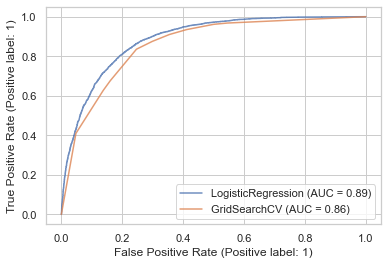

In [61]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_dt_disp = RocCurveDisplay.from_estimator(grid_dt, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## 8-4 Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_test_pred_rf = model_rf.predict(X_test)

In [63]:
train_accuracy = model_rf.score(X_train, y_train)
test_accuracy = model_rf.score(X_test, y_test)

train_accuracy, test_accuracy

(0.9656338312474768, 0.9027721706365227)

In [64]:
y_test_pred_rf = model_rf.predict(X_test)
report = classification_report(y_test, y_test_pred_rf, target_names=['<=50K', '>50K'])
print(report)

              precision    recall  f1-score   support

       <=50K       0.95      0.85      0.90      7326
        >50K       0.87      0.96      0.91      7536

    accuracy                           0.90     14862
   macro avg       0.91      0.90      0.90     14862
weighted avg       0.91      0.90      0.90     14862



1. 收入小於或等於50K的類別（<=50K）：
* 精確度（Precision）: 0.95，這表示預測為<=50K中，有95%是正確的。    
* 召回率（Recall）: 0.85，這表示所有真實為<=50K的案例中，有85%被正確預測出來。    
* F1分數（F1-score）: 0.89，精確度和召回率的調和平均數，用於綜合評估精確度和召回率。    
2. 收入大於50K的類別（>50K）：        
* 精確度（Precision）: 0.86，這表示預測為>50K中，有86%是正確的。    
* 召回率（Recall）: 0.96，這表示所有真實為>50K的實例中，有96%被正確預測出來了。    
* F1分數（F1-score）: 0.91，精確度和召回率的調和平均數，用於綜合評估精確度和召回率。

<AxesSubplot:>

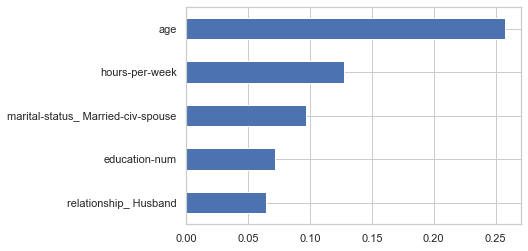

In [65]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-5:].plot(kind = 'barh')

### Random Forest Optimization

* n_estimators: int，森林裡樹木的數量，預設為10     
* max_depth: int或None，樹的最大深度，預設為None     
* bootstrap: 是否隨機抽樣，默認為True     
* max_features: 每個決策樹最大的特徵數量，預設為”auto”，max_features = n_features 
* max_leaf_nodes: 通過限制最大葉子節點數，防止過擬合，默認是"None”。如加了限制，會建立在最大葉子節點數內最優的決策樹。如果特徵不多，可以不考慮這個值

In [66]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=10))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))

In [67]:
hyper_params_rf = {"randomforestclassifier__n_estimators":[10,50,100,150,200],
                   "randomforestclassifier__max_depth":[5,10,15,20], 
                   "randomforestclassifier__max_leaf_nodes":[10,20,30]}

In [68]:
grid_rf = GridSearchCV(RandomForest, hyper_params_rf, scoring='recall', cv=3)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)

{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_leaf_nodes': 20, 'randomforestclassifier__n_estimators': 10}


In [69]:
y_test_pred_gridrf = grid_rf.predict(X_test)

In [70]:
y_test_pred_gridrf = grid_rf.predict(X_test)
report = classification_report(y_test, y_test_pred_gridrf, target_names=['<=50K', '>50K'])
print(report)

              precision    recall  f1-score   support

       <=50K       0.86      0.66      0.75      7326
        >50K       0.73      0.90      0.81      7536

    accuracy                           0.78     14862
   macro avg       0.80      0.78      0.78     14862
weighted avg       0.80      0.78      0.78     14862



1. 收入小於或等於50K的類別（<=50K）：
* 精確度（Precision）: 0.86，這表示預測為<=50K中，有86%是正確的。    
* 召回率（Recall）: 0.66，這表示所有真實為<=50K的案例中，有66%被正確預測出來。    
* F1分數（F1-score）: 0.75，精確度和召回率的調和平均數，用於綜合評估精確度和召回率。    
2. 收入大於50K的類別（>50K）：        
* 精確度（Precision）: 0.73，這表示預測為>50K中，有73%是正確的。    
* 召回率（Recall）: 0.90，這表示所有真實為>50K的實例中，有90%被正確預測出來了。    
* F1分數（F1-score）: 0.81，精確度和召回率的調和平均數，用於綜合評估精確度和召回率。

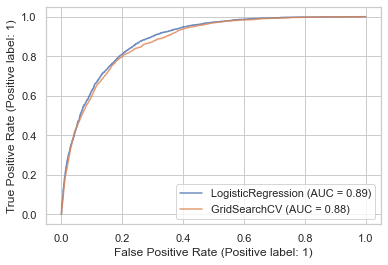

In [71]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_rf_disp = RocCurveDisplay.from_estimator(grid_rf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## 8.5 XgBoost

In [72]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
y_test_pred_xg = model_xg.predict(X_test)

In [73]:
train_accuracy = model_xg.score(X_train, y_train)
test_accuracy = model_xg.score(X_test, y_test)

train_accuracy, test_accuracy

(0.8501379356748755, 0.8348809043197416)

In [74]:
y_test_pred_xg = model_xg.predict(X_test)
report = classification_report(y_test, y_test_pred_xg, target_names=['<=50K', '>50K'])
print(report)

              precision    recall  f1-score   support

       <=50K       0.86      0.79      0.83      7326
        >50K       0.81      0.88      0.84      7536

    accuracy                           0.83     14862
   macro avg       0.84      0.83      0.83     14862
weighted avg       0.84      0.83      0.83     14862



1. 收入小於或等於50K的類別（<=50K）：
* 精確度（Precision）: 0.86，這表示預測為<=50K中，有86%是正確的。    
* 召回率（Recall）: 0.79，這表示所有真實為<=50K的案例中，有79%被正確預測出來。    
* F1分數（F1-score）: 0.83，精確度和召回率的調和平均數，用於綜合評估精確度和召回率。    
2. 收入大於50K的類別（>50K）：        
* 精確度（Precision）: 0.81，這表示預測為>50K中，有81%是正確的。    
* 召回率（Recall）: 0.88，這表示所有真實為>50K的實例中，有88%被正確預測出來了。    
* F1分數（F1-score）: 0.84，精確度和召回率的調和平均數，用於綜合評估精確度和召回率。

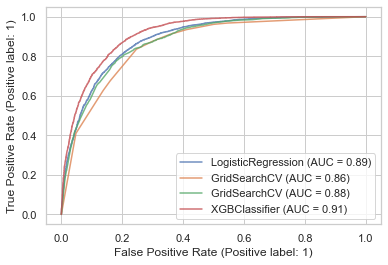

In [75]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_dt_disp = RocCurveDisplay.from_estimator(grid_dt, X_test, y_test, ax=ax, alpha=0.8)
grid_rf_disp = RocCurveDisplay.from_estimator(grid_rf, X_test, y_test, ax=ax, alpha=0.8)
model_xg_disp = RocCurveDisplay.from_estimator(model_xg, X_test, y_test, ax=ax, alpha=0.8)
plt.show()